In [1]:
import os
import gc
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split  # Importar train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
mac = pd.read_csv('/content/big-mac-full-index.csv', delimiter=',')

filtrado = "COL"
df_filtrado = mac[mac["iso_a3"] == filtrado]

df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])
df_filtrado['year'] = df_filtrado['date'].dt.year

# Seleccionar las características (X) y la variable objetivo (y)
X = df_filtrado[["year", "dollar_ex", "adj_price", "USD_adjusted", "dollar_price"]]
y = df_filtrado["local_price"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Crear y entrenar el modelo de Random Forest
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, y_train)

# Hacer predicciones para un año específico
año_a_predecir = 2025
entrada_prediccion = [[año_a_predecir, 4295.100, 3.481924,-0.11751, 3.480711 	]]  # None para las otras características
precio_predicho = regressor_rf.predict(entrada_prediccion)

# Calcular métricas de evaluación (opcional)
mse_rf = mean_squared_error(y_test, regressor_rf.predict(X_test))
print("MSE con Random Forest: %.3f" % mse_rf)

# Mostrar la predicción
print("Predicción de precio para el año", año_a_predecir, ":", precio_predicho)

MSE con Random Forest: 738004.750
Predicción de precio para el año 2025 : [14149.]


<ipython-input-13-83a3e5e78c07>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])
<ipython-input-13-83a3e5e78c07>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['year'] = df_filtrado['date'].dt.year
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
mac = pd.read_csv('/content/big-mac-full-index.csv', delimiter=',')

filtrado = "COL"
df_filtrado = mac[mac["iso_a3"] == filtrado]

df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])
df_filtrado['year'] = df_filtrado['date'].dt.year
# Define las características (X) seleccionando las columnas relevantes del DataFrame df_filtrado
X = df_filtrado[["year","dollar_ex", "dollar_price", "USD_raw", "EUR_raw", "GBP_raw", "JPY_raw", "CNY_raw",
                 "GDP_bigmac", "adj_price", "USD_adjusted", "EUR_adjusted", "GBP_adjusted", "JPY_adjusted", "CNY_adjusted"]]

# Define la variable objetivo (y)
y = df_filtrado["local_price"]

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle=True)

# Crea una instancia del modelo de regresión basado en árbol de decisión
regressor = DecisionTreeRegressor(max_depth=20)  # Puedes ajustar la profundidad máxima

# Entrena el modelo en los datos de entrenamiento
regressor.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Error cuadrático medio: {mse}")
print(f"Error Absoluto Medio (MAE): {mae:.3f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.3f}")

entrada_prediccion = [[2022,4295.100, 3.481924, -0.32413,-0.26954, -0.21606, 0.23043, -0.02143, 7940.328475, 3.481924, -0.11751, -0.15284, -0.05986, 0.53162, 0.02329]]
print("R1: ", regressor.predict(entrada_prediccion) )

Error cuadrático medio: 675714.2857142857
Error Absoluto Medio (MAE): 585.714
Raíz del Error Cuadrático Medio (RMSE): 822.018
R1:  [14950.]


<ipython-input-2-2a02f2aab668>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])
<ipython-input-2-2a02f2aab668>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['year'] = df_filtrado['date'].dt.year
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


<ipython-input-12-05c1ae7e1d7c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])
<ipython-input-12-05c1ae7e1d7c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['year'] = df_filtrado['date'].dt.year


NameError: ignored

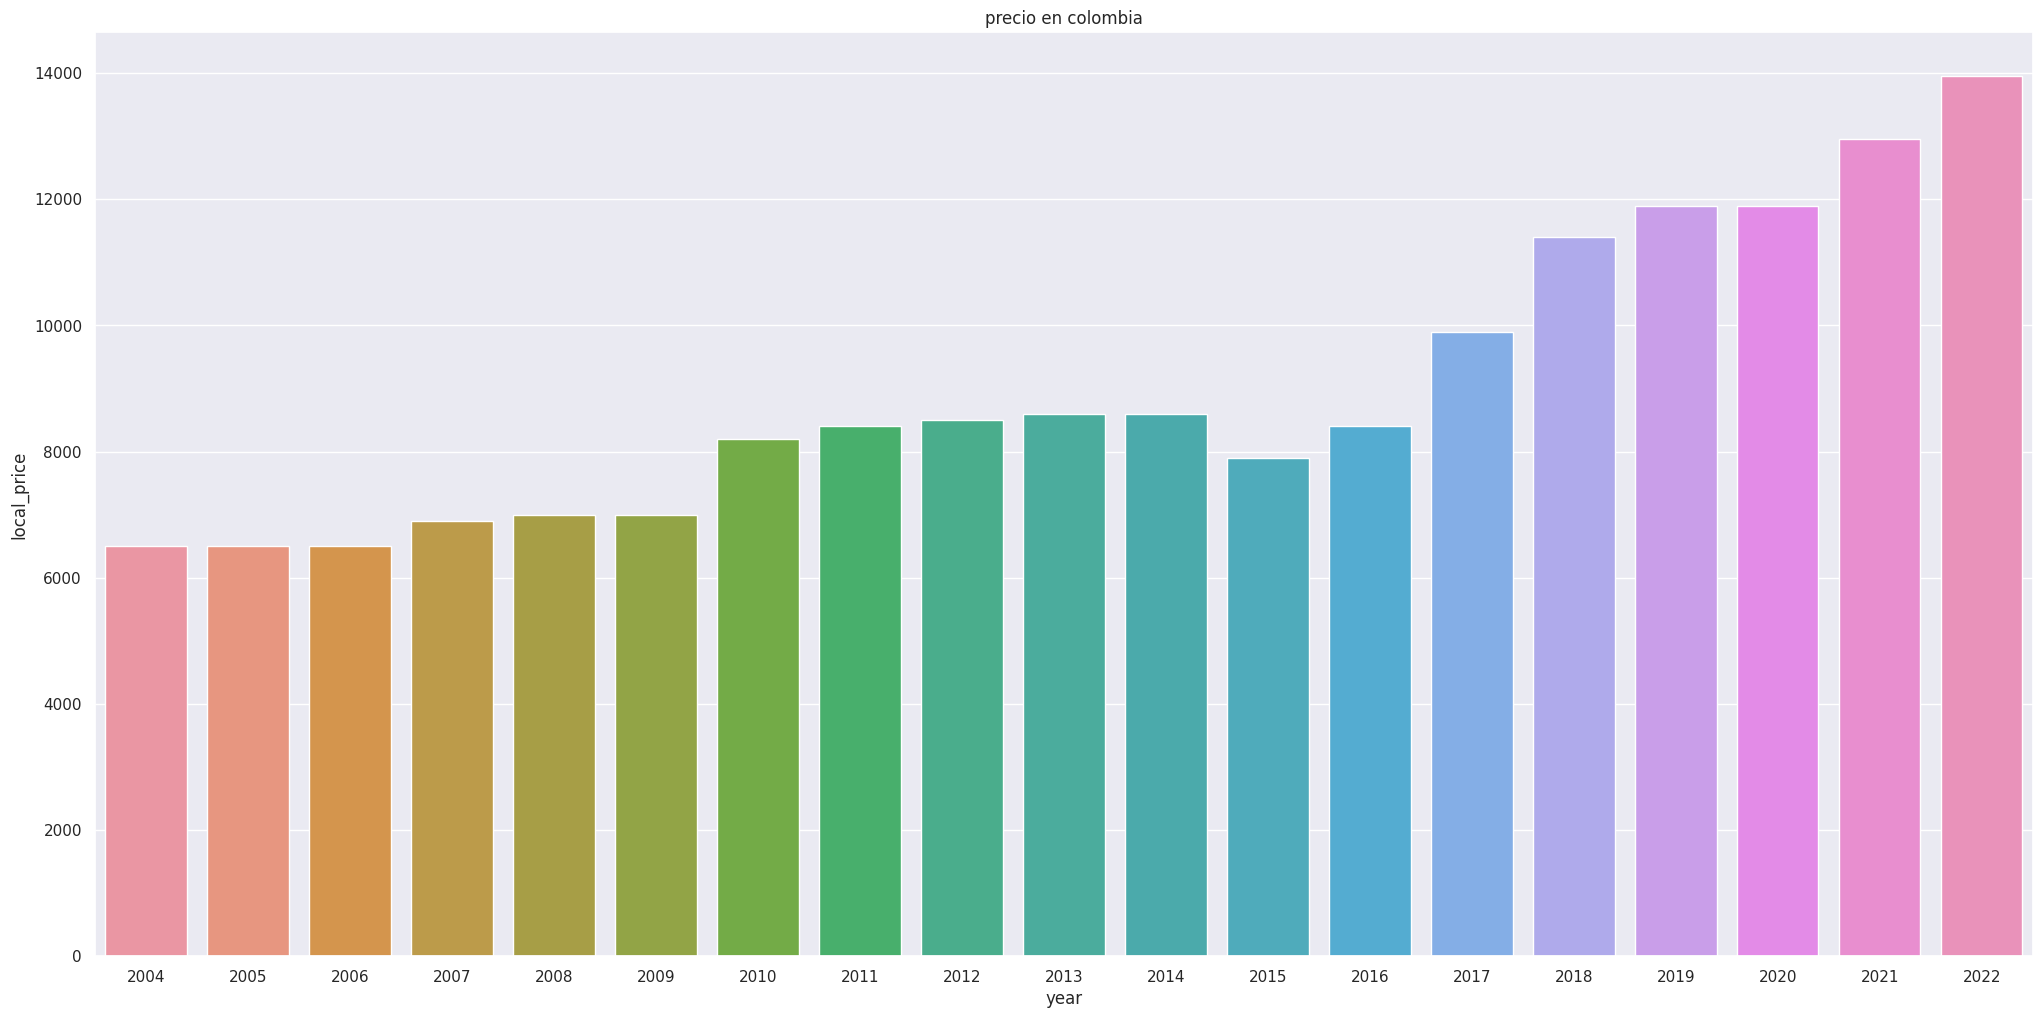

In [ ]:
from sklearn.metrics import classification_report
mac = pd.read_csv('/content/big-mac-full-index.csv', delimiter=',')

mac.describe()
#mac.head(100)

filtrado = "COL"
df_filtrado = mac[mac["iso_a3"] == filtrado]

mac['corr_movil'] = mac['dollar_ex'].corr(mac['local_price'])


df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])

df_filtrado['year'] = df_filtrado['date'].dt.year

promedio = df_filtrado.groupby('year')['local_price'].mean().reset_index()

mac2 = pd.read_csv('/content/big-mac-full-index.csv', delimiter=',')

mac2.head(10)

plt.figure(figsize=(25, 12))
plt.xlabel('año')
plt.ylabel('Frecuencia')
plt.title('precio en colombia')

sns.barplot(x='year', y='local_price', data=promedio)


X = df_filtrado["year"]
y = df_filtrado["local_price"]

# Reshape X para que sea una matriz 2D (n_samples, n_features)
X = X.values.reshape(-1, 1)

# Crea y ajusta el modelo de regresión lineal
modelo = RandomForestRegressor()
modelo.fit(X, y)

# Calcula las predicciones del modelo
y_pred = modelo.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='local_price', data=df_filtrado, label='Datos reales')
plt.plot(df_filtrado['year'], y_pred, color='red', label='Regresión lineal')
plt.xlabel('year')
plt.ylabel('year')
plt.legend()
plt.title('Gráfica de Regresión Lineal')
plt.show()

pendiente = modelo.coef_[0]
ordenada_al_origen = modelo.intercept_

print(f"La ecuación de la línea de regresión es: y = {pendiente:.2f}x + {ordenada_al_origen:.2f}")

correlation_matrix = mac.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
print(df_filtrado)

            date iso_a3 currency_code      name  local_price  dollar_ex  \
128   2004-05-01    COL           COP  Colombia       6500.0   2769.830   
169   2005-06-01    COL           COP  Colombia       6500.0   2327.700   
242   2006-05-01    COL           COP  Colombia       6500.0   2503.600   
283   2007-01-01    COL           COP  Colombia       6900.0   2239.325   
324   2007-06-01    COL           COP  Colombia       6900.0   1956.000   
365   2008-06-01    COL           COP  Colombia       7000.0   1798.650   
405   2009-07-01    COL           COP  Colombia       7000.0   2095.600   
446   2010-01-01    COL           COP  Colombia       8200.0   2095.600   
487   2010-07-01    COL           COP  Colombia       8200.0   1868.450   
528   2011-07-01    COL           COP  Colombia       8400.0   1770.500   
571   2012-01-01    COL           COP  Colombia       8400.0   1852.150   
614   2012-07-01    COL           COP  Colombia       8600.0   1804.475   
655   2013-01-01    COL  

In [9]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
mac = pd.read_csv('/content/big-mac-full-index.csv', delimiter=',')
df_filtrado = mac[mac["iso_a3"] == "COL"]
aa= df_filtrado
aaY=aa['local_price']
aaX = aa.drop('local_price', axis=1)
aaX = aaX.drop('currency_code', axis=1)
aaX = aaX.drop('iso_a3', axis=1)
aaX = aaX.drop('name', axis=1)
aaX = aaX.drop('date', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(aaX, aaY, test_size=0.2, random_state=21)

Epoch 1/100
25/25 [==============================] - 3s 28ms/step - loss: 3537511.2500 - accuracy: 0.0000e+00 - val_loss: 2754627.2500 - val_accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 2607392.7500 - accuracy: 0.0000e+00 - val_loss: 2913480.2500 - val_accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 2752636.2500 - accuracy: 0.0000e+00 - val_loss: 2921356.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 2415284.7500 - accuracy: 0.0000e+00 - val_loss: 3041693.5000 - val_accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 2413128.5000 - accuracy: 0.0000e+00 - val_loss: 2769745.7500 - val_accuracy: 0.0000e+00
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 2675971.7500 - accuracy: 0.0000e+00 - val_loss: 2912731.2500 - val_accuracy: 0.0000e+00
Epoch 7/100
25/25 [=============

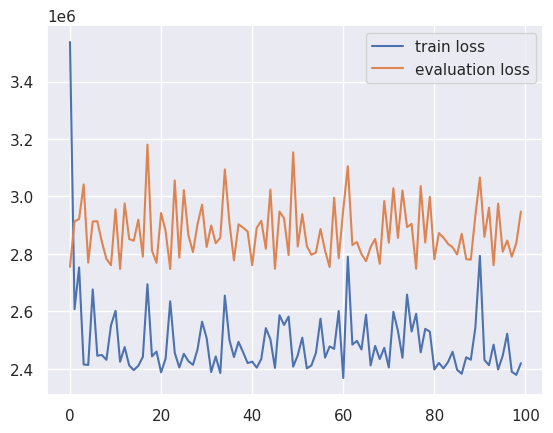

KeyError: ignored

In [ ]:
from tensorflow.keras.optimizers import SGD
model =  tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=(25,1)),
                             tf.keras.layers.Dense(2),
                             tf.keras.layers.Dense(4),
                             tf.keras.layers.Dense(8),
                             tf.keras.layers.Dense(4),
                             tf.keras.layers.Dense(2),
                             tf.keras.layers.Dense(1, activation='linear')])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
SGD = SGD (lr=0.01, momentum=0.9)
model.compile(loss='mse',
                optimizer=opt,
                metrics=['accuracy'])
iterations = 100

#history = model.fit(datos_entrenamiento["Fecha"], datos_entrenamiento["value"], epochs=iterations, batch_size=1, validation_data=(datos_validacion["Fecha"], datos_validacion["value"]))
history = model.fit(X_train, y_train, epochs=iterations, batch_size=1, verbose=True, validation_data=(X_test, y_test))
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss');
plt.plot(history.history['val_loss'], label='evaluation loss');
plt.legend()
plt.show();

plt.plot(history.history['mse'], label='train mse');
plt.plot(history.history['val_mse'], label='evaluation_mse');
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='evaluation mse')
plt.legend()
plt.show()
#mse = model.evaluate(x_test, y_test)

**PCA**

           date iso_a3 currency_code      name  local_price  dollar_ex  \
128  2004-05-01    COL           COP  Colombia       6500.0   2769.830   
169  2005-06-01    COL           COP  Colombia       6500.0   2327.700   
242  2006-05-01    COL           COP  Colombia       6500.0   2503.600   
283  2007-01-01    COL           COP  Colombia       6900.0   2239.325   
324  2007-06-01    COL           COP  Colombia       6900.0   1956.000   

     dollar_price  USD_raw  EUR_raw  GBP_raw  JPY_raw  CNY_raw   GDP_bigmac  \
128      2.346714 -0.04991 -0.28628 -0.30265  0.01213  0.86835  2528.754369   
169      2.792456  0.08235 -0.22067 -0.18833  0.19199  1.20109  2948.302966   
242      2.596261 -0.06609 -0.31077 -0.28830  0.16422  0.98453  3468.585328   
283      3.081286  0.06619 -0.19110 -0.19627  0.33799  1.17771  3790.153261   
324      3.527607  0.17587 -0.15342 -0.11967  0.54100  1.43876  3934.415150   

     adj_price  USD_adjusted  EUR_adjusted  GBP_adjusted  JPY_adjusted  \
128   

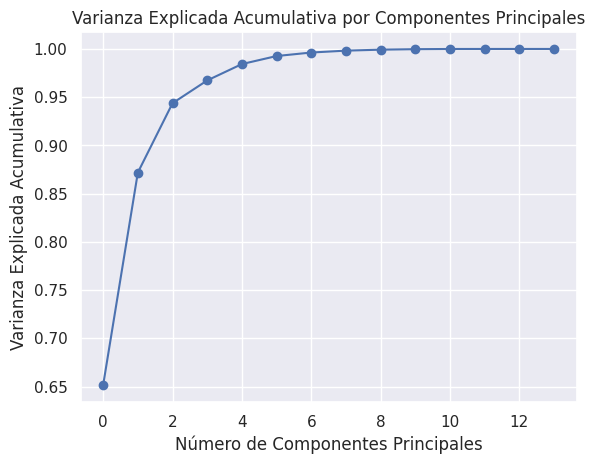

Número de componentes principales seleccionados: 4
           date iso_a3 currency_code      name  local_price  dollar_ex  \
128  2004-05-01    COL           COP  Colombia       6500.0   2769.830   
169  2005-06-01    COL           COP  Colombia       6500.0   2327.700   
242  2006-05-01    COL           COP  Colombia       6500.0   2503.600   
283  2007-01-01    COL           COP  Colombia       6900.0   2239.325   
324  2007-06-01    COL           COP  Colombia       6900.0   1956.000   

     dollar_price  USD_raw  EUR_raw  GBP_raw  ...  adj_price  USD_adjusted  \
128      2.346714 -0.04991 -0.28628 -0.30265  ...   2.002824       0.38476   
169      2.792456  0.08235 -0.22067 -0.18833  ...   2.152405       0.69802   
242      2.596261 -0.06609 -0.31077 -0.28830  ...   2.297945       0.40633   
283      3.081286  0.06619 -0.19110 -0.19627  ...   2.423222       0.56015   
324      3.527607  0.17587 -0.15342 -0.11967  ...   2.543391       0.72776   

     EUR_adjusted  GBP_adjusted  JP

<ipython-input-10-fd11b3b8e373>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[f'PC{i+1}'] = pca_result[:, i]
<ipython-input-10-fd11b3b8e373>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[f'PC{i+1}'] = pca_result[:, i]
<ipython-input-10-fd11b3b8e373>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que df_filtrado es tu conjunto de datos
# Mostrar las primeras filas del conjunto de datos
print(df_filtrado.head())

# Paso 1: Seleccionar las columnas relevantes (variables numéricas)
numeric_columns = aaX.select_dtypes(include=[np.number]).columns
data = aaX[numeric_columns]

# Paso 2: Normalización de datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Paso 3: Cálculo de la matriz de covarianza
cov_matrix = np.cov(scaled_data, rowvar=False)

# Paso 4: Descomposición de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Paso 5: Ordenar los autovalores de mayor a menor
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Paso 6: Calcular la varianza explicada acumulativa
explained_variance_ratio = np.cumsum(eigenvalues_sorted) / np.sum(eigenvalues_sorted)

# Paso 7: Gráfico de varianza explicada acumulativa
plt.plot(explained_variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa por Componentes Principales')
plt.show()

# Paso 8: Elección del número de componentes principales (por ejemplo, conservar el 95% de la varianza)
num_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f'Número de componentes principales seleccionados: {num_components}')

# Paso 9: Aplicar PCA con el número elegido de componentes
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_data)

# Agregar los resultados de PCA al DataFrame original (df_filtrado)
for i in range(num_components):
    df_filtrado[f'PC{i+1}'] = pca_result[:, i]

# Mostrar el DataFrame con los componentes principales
print(df_filtrado.head())


